# 1. 프로젝트 목표 및 목적

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import warnings; warnings.filterwarnings('ignore')

%matplotlib inline

import os

In [2]:
print(tf.__version__)

2.4.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [4]:
!cd /content/gdrive/MyDrive/GraduationProject 
# MyDrive(내 드라이브)안에 바로가기를 만들면 된다. => "!"추가하여 바로가기 생성하지 않아도됨.

In [5]:
from subprocess import check_output
print(check_output(['ls']).decode('utf8'))

gdrive
sample_data



In [6]:
os.chdir('/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127')

In [7]:
print(check_output(['ls']).decode('utf8'))

ahn_cheol_soo
Alejandro_Toledo
Alvaro_Uribe
Amelie_Mauresmo
Andre_Agassi
angelina_danilova
Angelina_Jolie
anne_hathaway
Ariel_Sharon
Arnold_Schwarzenegger
Atal_Bihari_Vajpayee
ben_afflek
beyonce
Bill_Clinton
billie_eilish
Carlos_Menem
Colin_Powell
David_Beckham
Donald_Rumsfeld
eden_hazard
elton_john
eminem
fan_bingbing
felix
George_Robertson
George_W_Bush
Gerhard_Schroeder
Gloria_Macapagal_Arroyo
Gray_Davis
Guillermo_Coria
Hamid_Karzai
Hans_Blix
Hugo_Chavez
ibrahimovic
Igor_Ivanov
jack_ma
Jack_Straw
Jacques_Chirac
Jean_Chretien
Jennifer_Aniston
Jennifer_Capriati
Jennifer_Lopez
Jeremy_Greenstock
jerry_seinfeld
Jiang_Zemin
jin
joe_biden
John_Ashcroft
john_cena
john_legend
John_Negroponte
Jose_Maria_Aznar
Juan_Carlos_Ferrero
Junichiro_Koizumi
kang_kyung_wha
kanye_west
keisuke_honda
kim_se_jeong
kim_seon_ho
kim_soo_hyun
kim_tae_hee
Kofi_Annan
kristen_stewart
kylie_jenner
Laura_Bush
liam neeson
Lindsay_Davenport
Lleyton_Hewitt
lucas_bravo
Luiz_Inacio_Lula_da_Silva
madonna
Mahmoud_Abbas
maro

# 2. 관련 데이터 수집

이미지 -> numpy.ndarray 형태로 되어 있어야 읽을 수 있다.

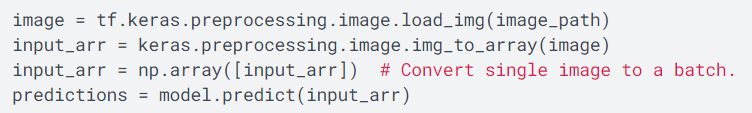

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

- OpenCV 경로 문제

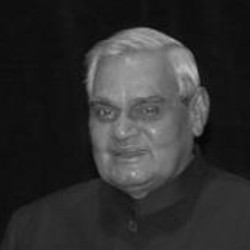

[[17 16 15 ... 16 17 17]
 [16 16 15 ... 16 17 17]
 [16 16 15 ... 17 17 17]
 ...
 [29 33 37 ... 47 48 48]
 [30 34 38 ... 46 47 47]
 [30 34 38 ... 46 47 47]]


ValueError: ignored

In [43]:
import cv2
from google.colab.patches import cv2_imshow
import glob
# import numpy as np

X_train = np.ndarray([])
y_train = np.ndarray([])
data_folder = '/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127/'
folder_list = os.listdir(data_folder)

for folder in folder_list:
  X_data = np.ndarray([])
  y_label = folder
  np.append(y_train, np.array([y_label]))
  files = glob.glob(folder + '*.jpg')
  path = data_folder + folder
  for filename in os.listdir(data_folder + folder):
    path_new = path +'/'+ filename
    img = cv2.imread(path_new, cv2.IMREAD_GRAYSCALE)
    cv2_imshow(img)
    print(img)
    np.vstack((X_data, img))
    print(type(X_data))
    print(X_data.shape)
    break
  np.append(X_train, X_data)
  break

In [9]:
import cv2
import glob
# import numpy as np

X_train = []
y_train = []
data_folder = '/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127/'
folder_list = os.listdir(data_folder)
for folder in folder_list:
  X_data = []
  y_label = folder
  y_train.append(y_label)
  files = glob.glob(folder + '*.jpg')
  for filename in os.listdir(data_folder + folder):
    # print(filename)
    image = cv2.imread(filename, 0)
    X_data.append(image)
  X_train.append(X_data)

In [ ]:
print(X_train)
temp = np.array(X_train)
print(temp)

[[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None

In [ ]:
print(y_train)

['Atal_Bihari_Vajpayee', 'Amelie_Mauresmo', 'Arnold_Schwarzenegger', 'Alejandro_Toledo', 'Bill_Clinton', 'Carlos_Menem', 'Ariel_Sharon', 'Angelina_Jolie', 'Alvaro_Uribe', 'Andre_Agassi', 'Gray_Davis', 'David_Beckham', 'Colin_Powell', 'George_W_Bush', 'Hamid_Karzai', 'Guillermo_Coria', 'Donald_Rumsfeld', 'Gerhard_Schroeder', 'Gloria_Macapagal_Arroyo', 'George_Robertson', 'Jennifer_Capriati', 'Jean_Chretien', 'Hugo_Chavez', 'Igor_Ivanov', 'Jack_Straw', 'Jeremy_Greenstock', 'Jennifer_Aniston', 'Jacques_Chirac', 'Hans_Blix', 'Jennifer_Lopez', 'Lindsay_Davenport', 'Juan_Carlos_Ferrero', 'Jiang_Zemin', 'Junichiro_Koizumi', 'Laura_Bush', 'Lleyton_Hewitt', 'Jose_Maria_Aznar', 'John_Ashcroft', 'Kofi_Annan', 'John_Negroponte', 'Megawati_Sukarnoputri', 'Naomi_Watts', 'Pete_Sampras', 'Mahmoud_Abbas', 'Ricardo_Lagos', 'Luiz_Inacio_Lula_da_Silva', 'Recep_Tayyip_Erdogan', 'Nestor_Kirchner', 'Michael_Bloomberg', 'Paul_Bremer', 'Rudolph_Giuliani', 'Vicente_Fox', 'Roh_Moo-hyun', 'Saddam_Hussein', 'Silvi

In [ ]:
# X_train = np.array([])
# y_train = []

# data_folder = '/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127/'
# folder_list = os.listdir(data_folder)
# for folder in folder_list:
#   X_train_temp = np.array([])
#   label = folder
#   y_train.append(label)
#   print(label)
#   for filename in os.listdir(data_folder + folder):
#     print(file)
#     file = data_folder + '/' + folder + '/' + filename
#     img = load_img(file, grayscale = True)
#     input_arr = img_to_array(img)
#     input_arr = np.array([input_arr])
#     # X_train_temp.append(input_arr)
  
#   # X_train.append([X_train_temp])

    

Atal_Bihari_Vajpayee
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0001.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0002.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0003.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0004.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0005.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0006.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0127//Atal_Bihari_Vajpayee/Atal_Bihari_Vajpayee_0007.jpg
/content/gdrive/MyDrive/GraduationProject/SampleData/DATA_0

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-51-f9a9cf183702>", line 14, in <module>
    img = load_img(file, grayscale = True)
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/preprocessing/image.py", line 300, in load_img
    target_size=target_size, interpolation=interpolation)
  File "/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of 

KeyboardInterrupt: ignored

## 데이터 불러오기

# 3. 데이터 전처리(`Data_Augmentation` 파일로 수행)

- Data Augmentation
  - 회전
  - 찌그러뜨리기
  - 확대
  - 좌우 반전
  - 조명
  - fill_mode = 'constant': 검정색으로 채움

- 인식률 높이기 
  ( Under some restrictions, such as lack of brightness, information of face etc. )
  - Adjusting Brightness
  - Adjusting Contrast
  - Crop ( 샘플 데이터에서의 안면이 치우쳐져 있는 경우가 많을 경우 )

# 4. 학습을 위한 데이터 전처리

- scaling

- Train/Test split

- Batch Normalization

# 5. 학습

- ResNet50
  - 224 x 224
- ResNet200
  - 320 x 320

### **학습 시 메모리 부족으로 훈련이 실패한다면 몇 가지 해결책**
1. mini-batch size 줄이기
2. stride를 이용하여 차원 축소
3. layer 제거
4. 32비트 부동소수 대신 16비트 부동소수 사용
5. 여러 장치에 CNN 분산

- 사전 훈련된 모델 이용

### ResNet-50


https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50

- ResNet-50은 224x224 크기의 사진을 넣어줘야 한다. 
  - 가로, 세로 비율 같다고 보고 resize
  - 가로, 세로 비율이 다르다면 tf.image.crop_and_resize() 적용

In [ ]:
image_resized = tf.image.resize(images, [224, 224])

- preprocess_input()은 0 ~ 255의 픽셀값을 가져야 한다. -> images_resized * 255

In [ ]:
inputs = keras.applications.resnet50.preprocess_input(images_resized * 255)

In [ ]:
model = keras.applications.resnet50.ResNet50(weights = 'imagenet')

In [ ]:
# Sparse vs 그냥
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossEntropy(), metric = ['accuracy']) 


NameError: ignored

### VGGNet

In [ ]:
# model = tf.keras.Sequential([
#   tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
#   tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
#   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#   tf.keras.layers.Dropout(rate=0.5),
#   tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
#   tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
#   tf.keras.layers.MaxPool2D(pool_size=(2,2)),
#   tf.keras.layers.Dropout(rate=0.5),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(units=512, activation='relu'),
#   tf.keras.layers.Dropout(rate=0.5),
#   tf.keras.layers.Dense(units=256, activation='relu'),
#   tf.keras.layers.Dropout(rate=0.5),
#   tf.keras.layers.Dense(units=10, activation='softmax')
# ])

# model.compile(optimizer=tf.keras.optimizers.Adam(), 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])

# model.summary()

# 6. 평가 및 튜닝

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(X_test, y_test)